In [4]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

from BSE import market_session

tdump=open('new.csv','w')
trial_id = 'pula_mea2'
dump_all = True
verbose = False

sup_range = (60, 60)
dem_range = (140, 140)
start_time = 0 
end_time = 60 * 60 * 24 * 5

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]
#plot_sup_dem(10, [sup_range], 10, [dem_range], 'fixed')
order_sched = {'sup': supply_schedule, 'dem': demand_schedule, 'interval': 5, 'timemode': 'drip-poisson' }

list_averages_k4 = {}
list_averages2_k4 = {}
F_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#F_values = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
for k in [5]:
    for F in F_values:
        trial = 0
        list_exp = np.empty(0)
        list_prde = np.empty(0)

        while (trial < 3):
            trial_id = f'exp_k={k}_F={F}_trail={trial}'
            buyers_spec = [('PRDE_EXP', 10, {'k': k, 's_min': -1.0, 's_max': +1.0, 'F': F}),
                ('PRDE', 10, {'k': 4,'s_min': -1.0, 's_max': +1.0, 'F': 0.8})]
                
            sellers_spec = buyers_spec
            traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
            
            market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)
            
            sum_prde_buy = 0
            sum_exp_buy = 0
            sum_prde_sell = 0
            sum_exp_sell = 0
            nr_trader = 0
            y_prde = np.empty(0)
            y_exp = np.empty(0)
            
            with open(trial_id + '_exp.csv', newline='') as csvfile:
                reader = csv.reader(csvfile)
                for row in reader:
                    time = float(row[0])
                    sum_prde_buy += float(row[1])
                    sum_prde_sell += float(row[2])
                    sum_exp_buy += float(row[3])
                    sum_exp_sell += float(row[4]) 
                    nr_trader += 1
                    y_prde = np.append(y_prde, (sum_prde_buy+ sum_prde_sell)/nr_trader)
                    y_exp = np.append(y_exp, (sum_exp_buy + sum_exp_sell)/nr_trader)

            list_exp = np.append(list_exp, y_exp[-1])
            list_prde = np.append(list_prde, y_prde[-1])

            trial += 1

        average_exp = np.mean(list_exp)
        average_prde = np.mean(list_prde)
        list_averages_k4[F] = average_exp 
        list_averages2_k4[F] = average_prde


B00: PRDE_EXP active_strat=[0]:
[0]: s=+0.965471, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.090781, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.114441, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.968558, start=0.000000, $=0.000000, pps=0.000000
[4]: s=+0.401132, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE_EXP active_strat=[0]:
[0]: s=-0.452970, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.553847, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.556845, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.045956, start=0.000000, $=0.000000, pps=0.000000
[4]: s=+0.682187, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE_EXP active_strat=[0]:
[0]: s=+0.736661, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.364415, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.425560, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.895911, start=0.000000, $=0.000000, pps=0.000000
[4]: s=-0.508344, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE_EXP

KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

from BSE import market_session

In [2]:
list_averages_k4

{0.1: 100.70657967838675,
 0.2: 101.05341016964807,
 0.3: 103.1163008084964,
 0.4: 101.81276409908571,
 0.5: 98.39919635405461,
 0.6: 98.18308823833604,
 0.7: 106.4174151486694,
 0.8: 96.08457993364046,
 0.9: 101.29183398621943,
 1.0: 100.82592404342729}

In [3]:
list_averages2_k4

{0.1: 104.68553842032763,
 0.2: 101.41847234187624,
 0.3: 105.53127406852354,
 0.4: 100.14970628061435,
 0.5: 101.43764785648123,
 0.6: 98.62733379620288,
 0.7: 103.30026027143226,
 0.8: 98.00550395185279,
 0.9: 96.14317975041251,
 1.0: 100.07332960315277}

In [4]:
# Multiple trials with best configuration.
sup_range = (60, 60)
dem_range = (140, 140)
start_time = 0 
end_time = 60 * 60 * 24 * 5

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]
#plot_sup_dem(10, [sup_range], 10, [dem_range], 'fixed')
order_sched = {'sup': supply_schedule, 'dem': demand_schedule, 'interval': 5, 'timemode': 'drip-poisson' }

trial = 0
k = 4
F = 1.7
list_exp = np.empty(0)
list_prde = np.empty(0)

while (trial < 30):
    trial_id = f'best3_exp_k={k}_F={F}_trail={trial}'
    buyers_spec = [('PRDE_EXP', 10, {'k': k, 's_min': -1.0, 's_max': +1.0, 'F': F}),
        ('PRDE', 10, {'k': 4,'s_min': -1.0, 's_max': +1.0, 'F': 0.8})]            
    sellers_spec = buyers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
            
    market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)
            
    sum_prde_buy = 0
    sum_exp_buy = 0
    sum_prde_sell = 0
    sum_exp_sell = 0
    nr_trader = 0
    y_prde = np.empty(0)
    y_exp = np.empty(0)
            
    with open(trial_id + '_exp.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[0])
            sum_prde_buy += float(row[1])
            sum_prde_sell += float(row[2])
            sum_exp_buy += float(row[3])
            sum_exp_sell += float(row[4]) 
            nr_trader += 1
            y_prde = np.append(y_prde, (sum_prde_buy+ sum_prde_sell)/nr_trader)
            y_exp = np.append(y_exp, (sum_exp_buy + sum_exp_sell)/nr_trader)

    list_exp = np.append(list_exp, y_exp[-1])
    list_prde = np.append(list_prde, y_prde[-1])

    trial += 1


B00: PRDE_EXP active_strat=[0]:
[0]: s=+0.423988, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.621675, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.114648, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.824278, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE_EXP active_strat=[0]:
[0]: s=-0.924910, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.199337, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.405422, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.784769, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE_EXP active_strat=[0]:
[0]: s=+0.092303, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.767363, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.533588, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.407269, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE_EXP active_strat=[0]:
[0]: s=+0.197531, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.572035, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.396129, start=0.000000, $=0.00

In [5]:
list_exp

array([103.56594368,  93.47938618,  98.00296531,  99.44004414,
       105.50933682,  96.69974593,  86.96830452, 106.40654435,
       101.3547718 , 105.90592507,  94.76683831,  98.20440552,
       106.40710093, 103.54224562,  99.56872269, 101.83343741,
       114.3206304 , 109.20666747,  98.44061958, 101.97196206,
       110.22453729, 104.09562649, 110.42991831, 100.55569087,
       105.02416472,  97.92766494,  99.91024799, 107.61414228,
       110.70336457,  95.71794081])

In [6]:
list_prde

array([101.0465142 , 103.12331894,  96.95100907, 106.91831469,
        95.05419528,  98.76241585, 103.55777742, 104.95216748,
        92.40263402, 101.36109048,  98.10845871, 104.99214069,
       103.65111806,  92.26407533, 101.12562501, 107.29466353,
        99.77823674, 102.6482249 , 101.65178618,  98.82568992,
       112.22138296,  97.714605  , 107.01200449, 103.12317224,
       106.84716037,  98.74180757, 100.87615866, 110.50682281,
       110.53525678,  98.82552512])

In [10]:
# Multiple trials with best configuration. - Homo
sup_range = (60, 60)
dem_range = (140, 140)
start_time = 0 
end_time = 60 * 60 * 24 * 5

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]
#plot_sup_dem(10, [sup_range], 10, [dem_range], 'fixed')
order_sched = {'sup': supply_schedule, 'dem': demand_schedule, 'interval': 5, 'timemode': 'drip-poisson' }

trial = 0
k = 4
F = 1.7
list_exp = np.empty(0)
list_prde = np.empty(0)

while (trial < 30):
    trial_id = f'homo1_exp_k={k}_F={F}_trail={trial}'
    buyers_spec = [('PRDE_EXP', 20, {'k': k, 's_min': -1.0, 's_max': +1.0, 'F': F})]            
    sellers_spec = buyers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
            
    market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)
            
    sum_prde_buy = 0
    sum_exp_buy = 0
    sum_prde_sell = 0
    sum_exp_sell = 0
    nr_trader = 0
    y_prde = np.empty(0)
    y_exp = np.empty(0)
            
    with open(trial_id + '_exp.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[0])
            sum_prde_buy += float(row[1])
            sum_prde_sell += float(row[2])
            sum_exp_buy += float(row[3])
            sum_exp_sell += float(row[4]) 
            nr_trader += 1
            y_prde = np.append(y_prde, (sum_prde_buy+ sum_prde_sell)/nr_trader)
            y_exp = np.append(y_exp, (sum_exp_buy + sum_exp_sell)/nr_trader)

    list_exp = np.append(list_exp, y_exp[-1])
    list_prde = np.append(list_prde, y_prde[-1])

    trial += 1


B00: PRDE_EXP active_strat=[0]:
[0]: s=-0.647051, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.030829, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.937335, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.247188, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE_EXP active_strat=[0]:
[0]: s=+0.617342, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.719875, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.917018, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.928575, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE_EXP active_strat=[0]:
[0]: s=+0.620496, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.976578, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.367851, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.082906, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE_EXP active_strat=[0]:
[0]: s=-0.862303, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.997050, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.693165, start=0.000000, $=0.00

In [13]:
list_exp

array([210.14181701, 217.45919673, 201.38914978, 204.33505895,
       209.17051891, 195.87969043, 213.32086094, 197.97382769,
       203.87990408, 209.96325362, 199.60198078, 194.56262887,
       196.11618614, 200.82029174, 219.67565385, 205.12903717,
       205.80330146, 213.27239651, 195.48742442, 203.2575734 ,
       200.40283363, 193.32876332, 203.42122191, 190.19393667,
       210.2943569 , 217.63607493, 208.01721736, 196.63782499,
       203.99253983, 195.20284789])

In [49]:
list_exp_run2 = np.array([219.73731686, 195.78310716, 199.00166819, 207.15599756,
       213.47588342, 207.77225487, 206.48169332, 208.48694811,
       204.60586401, 206.27654132, 202.65214727, 207.93034845,
       197.02173355, 205.68920294, 201.50009776, 208.65577641,
       200.14128848, 206.87370644, 208.34277439, 196.45373411,
       195.82440749, 201.66676114, 211.36463953, 208.40183921,
       208.03234013, 209.83006514, 202.81852836, 199.22866234,
       203.43651579, 199.54620819])
list_exp= np.array([210.14181701, 217.45919673, 201.38914978, 204.33505895,
       209.17051891, 195.87969043, 213.32086094, 197.97382769,
       203.87990408, 209.96325362, 195.60198078, 199.56262887,
       196.11618614, 200.82029174, 219.67565385, 205.12903717,
       205.80330146, 213.27239651, 195.48742442, 203.2575734 ,
       200.40283363, 190.32876332, 203.42122191, 195.19393667,
       210.2943569 , 217.63607493, 208.01721736, 196.63782499,
       203.99253983, 199.20284789])
homo_runs_exp = np.concatenate((list_exp, list_exp_run2))

In [46]:
len(homo_runs_exp)

60

In [7]:
homo_runs_prde=np.array([191.20468248, 201.46840623, 204.12006846, 202.67824206,
       215.20882272, 193.21321011, 201.58395777, 210.04510336,
       199.43632659, 201.45744896, 204.14624692, 207.19014129,
       194.85489956, 195.41309855, 201.90306893, 198.88254783,
       201.8114704 , 188.32256614, 190.50883925, 195.87775585,
       211.10987834, 205.46533647, 202.90798287, 190.75233844,
       206.7725368 , 204.09789787, 205.40529425, 207.2956097 ,
       202.24882048, 203.89227939, 210.13756053, 205.11793678,
       200.0716014 , 204.87094633, 206.47756886, 200.08312084,
       196.30857204, 201.79483061, 200.2035266 , 200.45944825,
       208.1512514 , 193.72283709, 196.39745324, 208.80565518,
       207.57728877, 198.90613936, 201.0029853 , 197.65761055,
       205.15972207, 204.51446503, 193.47843118, 201.64027292,
       203.28839736, 194.44206378, 202.41592294, 189.53429154,
       200.39510633, 200.88351334, 195.55478007, 193.60636343])

In [9]:
# import some useful libraries to help us wrangle data, 
# plot data, and perform statistial analysis 
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd

In [26]:
len(homo_runs_exp)

30

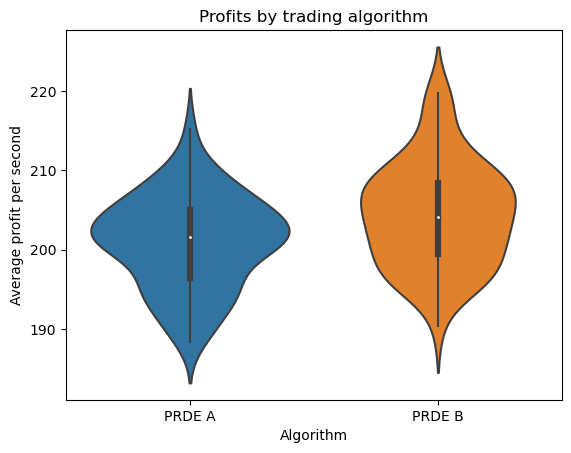

In [50]:
# Use seaborn to create a violin plot
ax = sns.violinplot(data=pd.DataFrame(data={"PRDE A": homo_runs_prde, "PRDE B": homo_runs_exp}), inner='box')
# Label our axes appropriately
ax.set_title("Profits by trading algorithm")
ax.set_ylabel("Average profit per second")
ax.set_xlabel("Algorithm")

plt.show()

<AxesSubplot:>

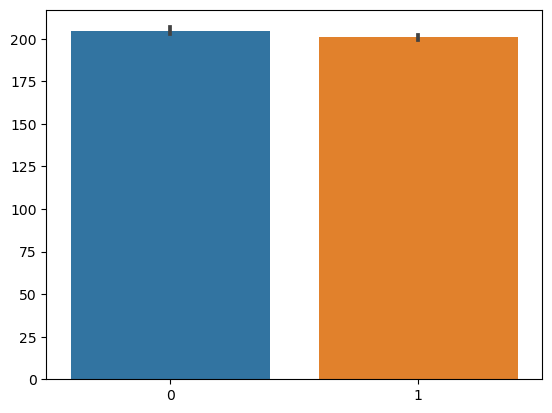

In [11]:
sns.barplot(data=[homo_runs_exp, homo_runs_prde])

In [53]:
# Shapiro-Wilk test tests the null hypothesis that 
# the data was drawn from a normal distribution

print("Using Shapiro-Wilk test to test the null hypothesis " +
      "that the data was drawn from a normal distribution:")

statistic, pvalue = stats.shapiro(homo_runs_prde)
if pvalue < 0.05:
      print("Condition " + "{:}" + 
            ". We can reject the null hypothesis (p=" + 
            "{:.2f}".format(pvalue) + 
            "). Therefore, data is not normally distributed.")
else:
        print("Condition " + "{:}" + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

Using Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution:
Condition {:}. We cannot reject the null hypothesis (p=0.62). Therefore, data is normally distributed.


In [52]:
# Shapiro-Wilk test tests the null hypothesis that 
# the data was drawn from a normal distribution

print("Using Shapiro-Wilk test to test the null hypothesis " +
      "that the data was drawn from a normal distribution:")

statistic, pvalue = stats.shapiro(homo_runs_exp)
if pvalue < 0.05:
      print("Condition " + "{:}" + 
            ". We can reject the null hypothesis (p=" + 
            "{:.2f}".format(pvalue) + 
            "). Therefore, data is not normally distributed.")
else:
        print("Condition " + "{:}" + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

Using Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution:
Condition {:}. We cannot reject the null hypothesis (p=0.27). Therefore, data is normally distributed.


In [54]:
# Use stats package from scipy to perform ANOVA 
statistic, pvalue = stats.f_oneway(homo_runs_exp, homo_runs_prde)
if pvalue < 0.05:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " < 0.05). Reject null. The groups have a " +
          "different population mean.") 
else:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " > 0.05). Cannot reject null hypothesis " + 
          "that groups have same population mean.")

ANOVA: (p=0.00 < 0.05). Reject null. The groups have a different population mean.


In [56]:
#T-test - check if the result is said to be statically significant
pvalue = stats.ttest_ind(homo_runs_exp, homo_runs_prde).pvalue

print(pvalue < 0.05)
print(pvalue)

True
0.0030497790639958397
